In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import itertools

In [123]:
data = pd.read_csv('data_final.csv')

In [124]:
data.head()

,Date,Date_Stamp,index,age,job,marital,education,default,housing,loan,...,MOM inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,29/05/2008,29/05/2008,0,56,housemaid,married,basic.4y,no,no,no,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
1,29/05/2008,29/05/2008,1,57,services,married,high.school,unknown,no,no,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
2,29/05/2008,29/05/2008,2,37,services,married,high.school,no,yes,no,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
3,29/05/2008,29/05/2008,3,40,admin.,married,basic.6y,no,no,no,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
4,29/05/2008,29/05/2008,4,56,services,married,high.school,no,no,yes,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20


In [125]:
data.drop(columns='Date', inplace=True)

In [126]:
data.head()

,Date_Stamp,index,age,job,marital,education,default,housing,loan,contact,...,MOM inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,29/05/2008,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
1,29/05/2008,1,57,services,married,high.school,unknown,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
2,29/05/2008,2,37,services,married,high.school,no,yes,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
3,29/05/2008,3,40,admin.,married,basic.6y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
4,29/05/2008,4,56,services,married,high.school,no,no,yes,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20


In [127]:
data.isna().sum()

Date_Stamp                         0
index                              0
age                                0
job                                0
marital                            0
education                          0
default                            0
housing                            0
loan                               0
contact                            0
month                              0
day_of_week                        0
duration                           0
campaign                           0
pdays                              0
previous                           0
poutcome                           0
emp.var.rate                       0
cons.price.idx                     0
cons.conf.idx                      0
euribor3m                          0
nr.employed                        0
y                                  0
MOM inflation                      0
Wage Growth                        0
EURUSD                             0
euro zoneGDP Growth Rate           0
P

In [128]:
#replacing the white spaces with '-'
#replacing the '.' with '-'
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '_')

In [129]:
data.head()

,Date_Stamp,index,age,job,marital,education,default,housing,loan,contact,...,MOM_inflation,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax
0,29/05/2008,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
1,29/05/2008,1,57,services,married,high.school,unknown,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
2,29/05/2008,2,37,services,married,high.school,no,yes,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
3,29/05/2008,3,40,admin.,married,basic.6y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20
4,29/05/2008,4,56,services,married,high.school,no,no,yes,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20


In [130]:
data_col = list(data.columns)

In [131]:
for col in data_col:
    print('Values for {}:\n{}\n\n'.format(col, data[col].value_counts()))

Values for Date_Stamp:
17/04/2009    6065
08/07/2008    4624
29/10/2008    3829
29/05/2008    2868
31/07/2008    2613
              ... 
28/10/2010       7
27/08/2009       7
05/02/2010       6
11/11/2010       5
29/06/2010       3
Name: Date_Stamp, Length: 76, dtype: int64


Values for index:
2047     1
34042    1
38232    1
11599    1
9550     1
        ..
33445    1
35492    1
21151    1
23198    1
0        1
Name: index, Length: 41188, dtype: int64


Values for age:
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Values for job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Values for marital:
married     24928
single    

In [132]:
data['age'].max()

98

In [133]:
data['age'].min()

17

In [134]:
data.loc[((data['age'] >= 16 ) & (data['age'] <= 24 )), 'Age_Group'] = '16-24'
data.loc[((data['age'] >= 25 ) & (data['age'] <= 34 )), 'Age_Group'] = '25-34'
data.loc[((data['age'] >= 35 ) & (data['age'] <= 44 )), 'Age_Group'] = '35-44'
data.loc[((data['age'] >= 45 ) & (data['age'] <= 54 )), 'Age_Group'] = '45-54'
data.loc[((data['age'] >= 55 ) & (data['age'] <= 64 )), 'Age_Group'] = '55-64'
data.loc[((data['age'] >= 65 ) & (data['age'] <= 74 )), 'Age_Group'] = '65-74'
data.loc[((data['age'] >= 75 ) & (data['age'] <= 79 )), 'Age_Group'] = '75-79'
data.loc[((data['age'] >= 80 )), 'Age_Group'] = '80+'

In [135]:
data.head()

,Date_Stamp,index,age,job,marital,education,default,housing,loan,contact,...,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax,Age_Group
0,29/05/2008,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64
1,29/05/2008,1,57,services,married,high.school,unknown,no,no,telephone,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64
2,29/05/2008,2,37,services,married,high.school,no,yes,no,telephone,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,35-44
3,29/05/2008,3,40,admin.,married,basic.6y,no,no,no,telephone,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,35-44
4,29/05/2008,4,56,services,married,high.school,no,no,yes,telephone,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64


In [136]:
data.columns

Index(['Date_Stamp', 'index', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'MOM_inflation', 'Wage_Growth', 'EURUSD', 'euro_zoneGDP_Growth_Rate',
       'Portugal_Income_Tax_annual_rate', 'Portugal_Bank_Lending_Rate',
       'Portugal_Personal_Savings', 'Portugal_Wages',
       'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax', 'Age_Group'],
      dtype='object')

binary

In [137]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [138]:
data['contact'].replace('telephone',1, inplace=True)
data['contact'].replace('cellular',0, inplace=True)

In [139]:
data['contact'].value_counts(dropna=False)

0    26144
1    15044
Name: contact, dtype: int64

change to numbers - month / day of the week

In [140]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [141]:
data['y'].replace('yes',1, inplace=True)
data['y'].replace('no',0, inplace=True)

In [142]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [143]:
data['month'].replace('mar',3, inplace=True)
data['month'].replace('apr',4, inplace=True)
data['month'].replace('may',5, inplace=True)
data['month'].replace('jun',6, inplace=True)
data['month'].replace('jul',7, inplace=True)
data['month'].replace('aug',8, inplace=True)
data['month'].replace('sep',9, inplace=True)
data['month'].replace('oct',10, inplace=True)
data['month'].replace('nov',11, inplace=True)
data['month'].replace('dec',12, inplace=True)

In [144]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [145]:
data['day_of_week'].replace('mon',1, inplace=True)
data['day_of_week'].replace('tue',2, inplace=True)
data['day_of_week'].replace('wed',3, inplace=True)
data['day_of_week'].replace('thu',4, inplace=True)
data['day_of_week'].replace('fri',5, inplace=True)

Columns to OHE
job, education, default, loan

In [146]:
job_dummy = pd.get_dummies(data['job'], prefix='job', drop_first=True)

In [147]:
job_dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [148]:
edu_dummy = pd.get_dummies(data['education'], prefix='edu', drop_first=True)

In [149]:
edu_dummy.head()

,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [150]:
default_dummy = pd.get_dummies(data['default'], prefix='default', drop_first=True)

In [151]:
default_dummy.head()

,default_unknown,default_yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [152]:
poutcome_dummy = pd.get_dummies(data['poutcome'], prefix='poutcome', drop_first=True)

In [153]:
poutcome_dummy.head()

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [154]:
marital_dummy = pd.get_dummies(data['marital'], prefix='marital', drop_first=True)

In [155]:
marital_dummy.head()

,marital_married,marital_single,marital_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [156]:
housing_dummy = pd.get_dummies(data['housing'], prefix='housing', drop_first=True)

In [157]:
housing_dummy.head()

,housing_unknown,housing_yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [158]:
loan_dummy = pd.get_dummies(data['loan'], prefix='loan', drop_first=True)

In [159]:
loan_dummy.head()

,loan_unknown,loan_yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [160]:
age_group_dummy = pd.get_dummies(data['Age_Group'], prefix='age_group', drop_first=True)

In [161]:
data.head()

,Date_Stamp,index,age,job,marital,education,default,housing,loan,contact,...,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax,Age_Group
0,29/05/2008,0,56,housemaid,married,basic.4y,no,no,no,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64
1,29/05/2008,1,57,services,married,high.school,unknown,no,no,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64
2,29/05/2008,2,37,services,married,high.school,no,yes,no,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,35-44
3,29/05/2008,3,40,admin.,married,basic.6y,no,no,no,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,35-44
4,29/05/2008,4,56,services,married,high.school,no,no,yes,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20,55-64


In [162]:
data_merged = pd.concat([data, loan_dummy, housing_dummy, marital_dummy, poutcome_dummy, default_dummy, edu_dummy, job_dummy, age_group_dummy], axis=1)

In [164]:
data_cleaned = data_merged.drop(columns=['Date_Stamp','index','age','loan','housing','marital','poutcome','default','education','job','Age_Group'],axis=1)

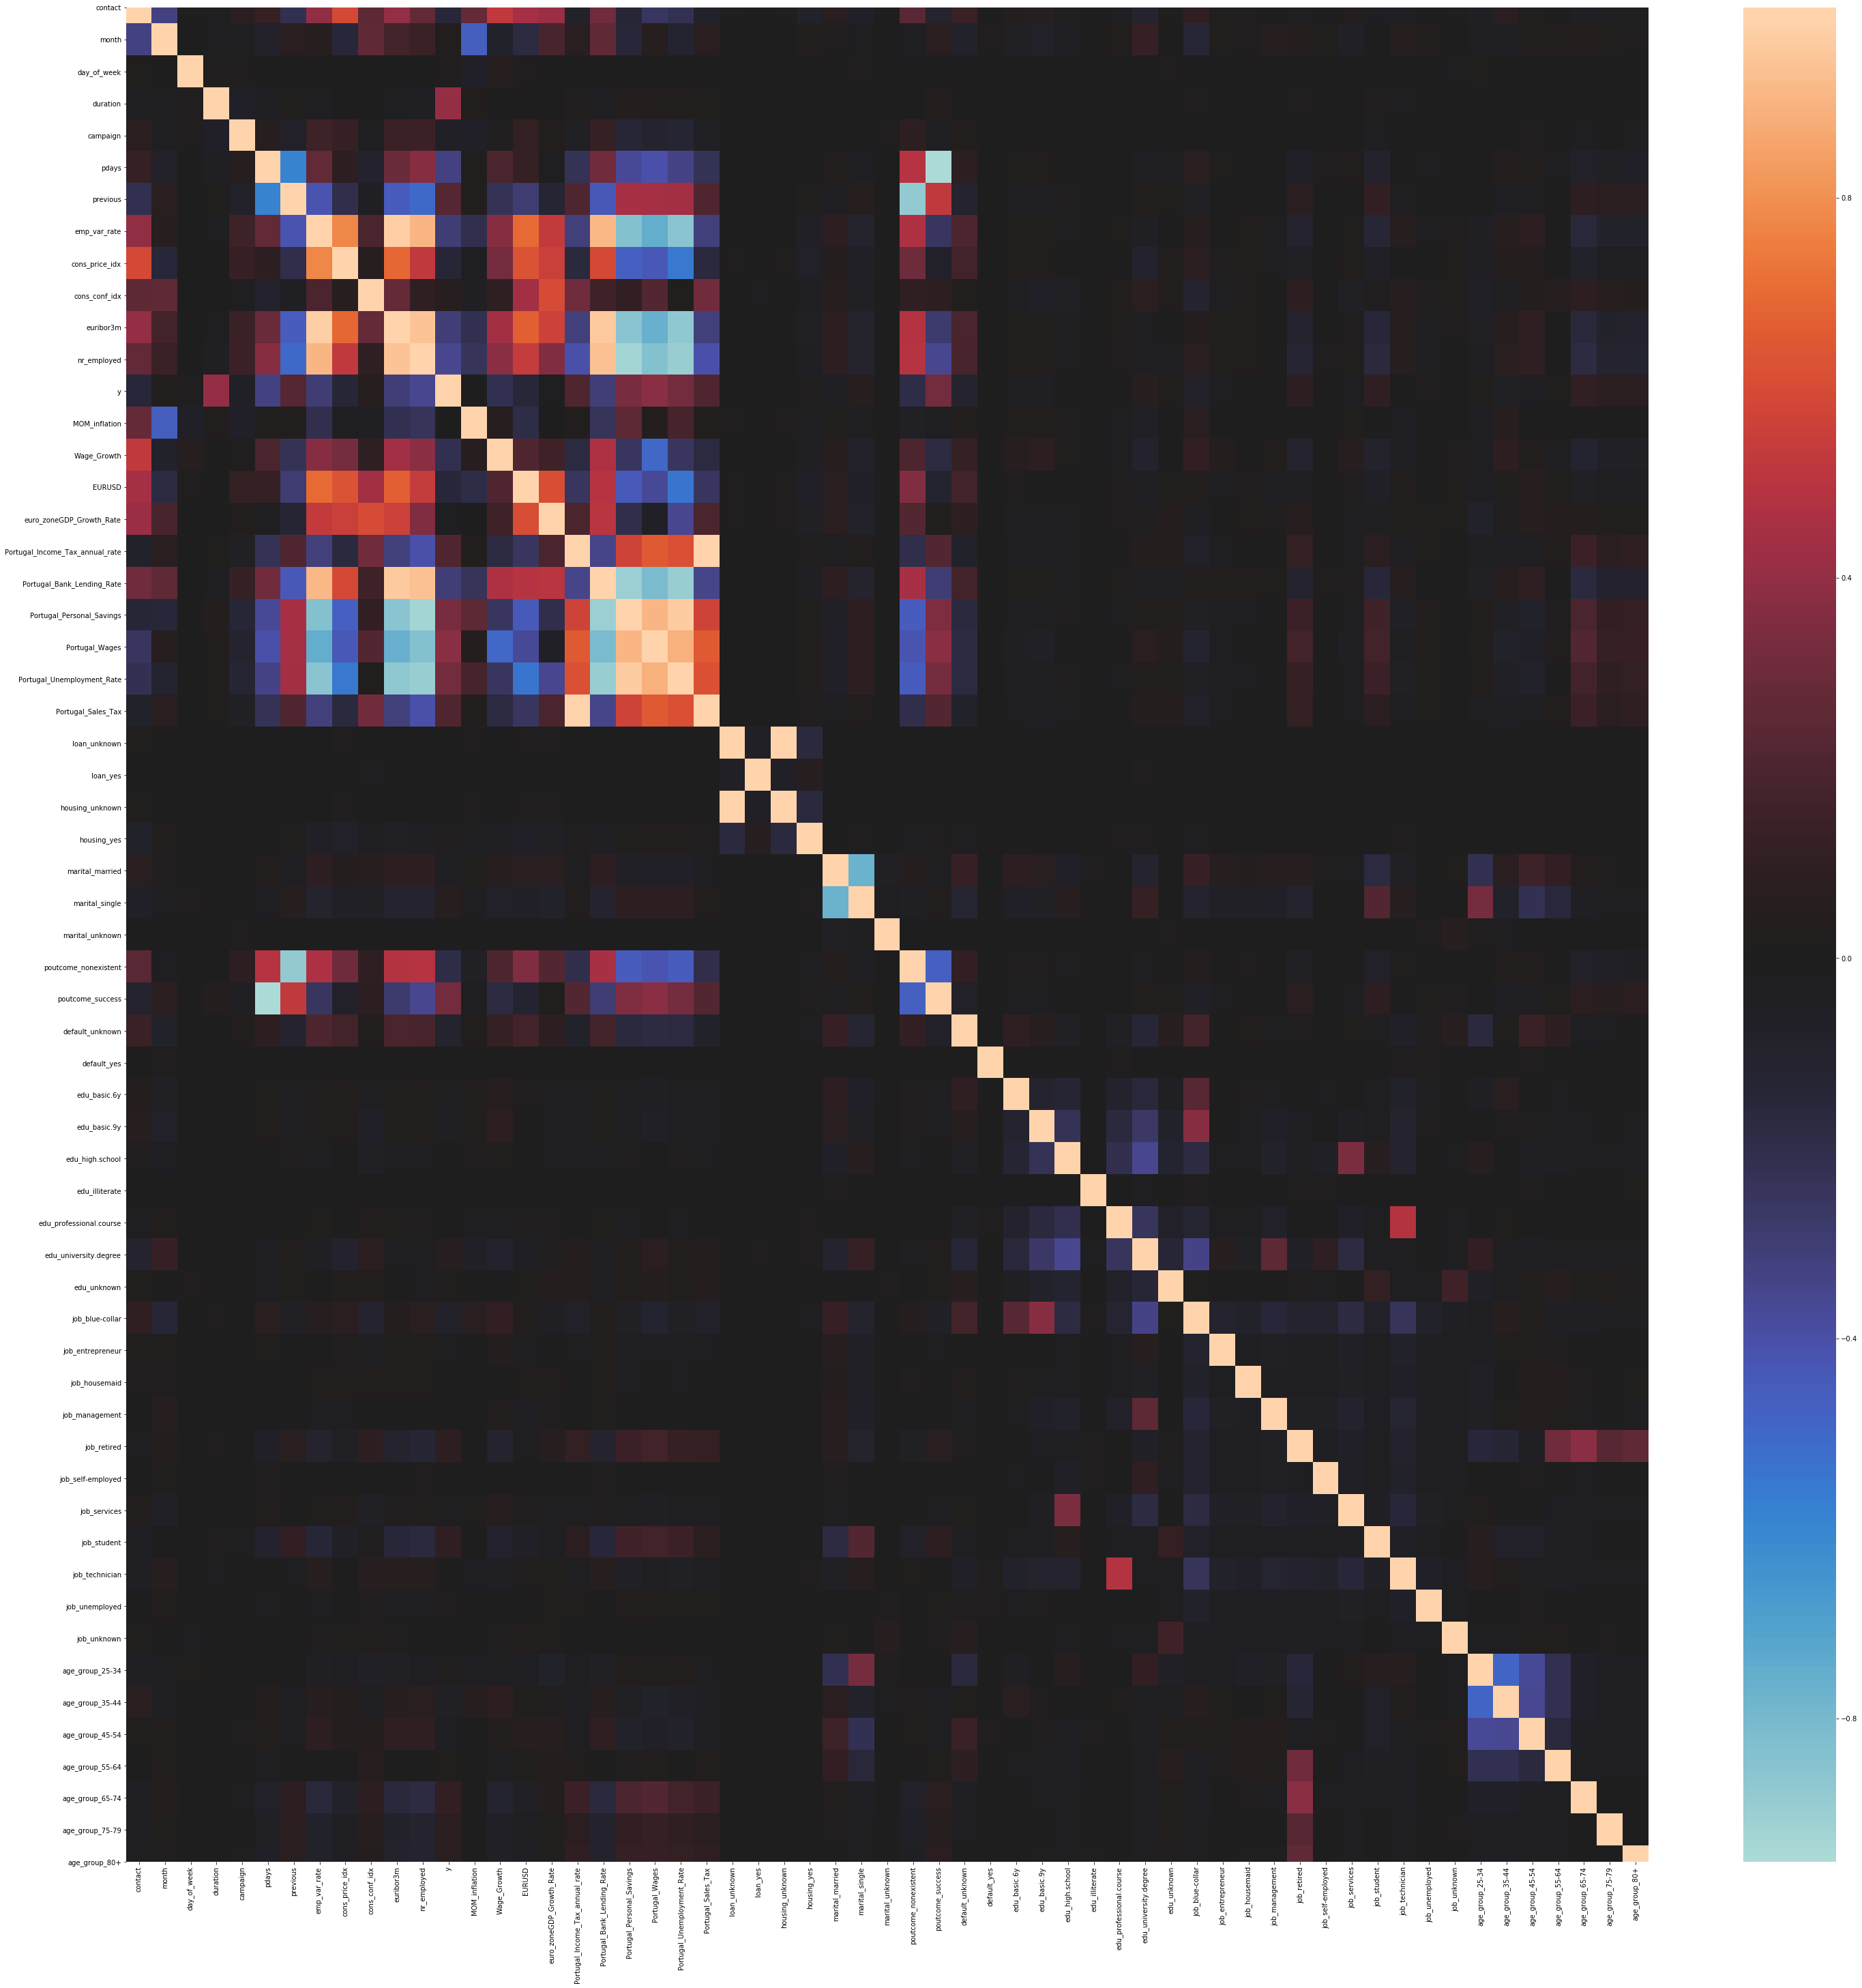

In [174]:
plt.figure(figsize=(50,50))
sns.heatmap(data_cleaned.corr(), center=0)
plt.show();

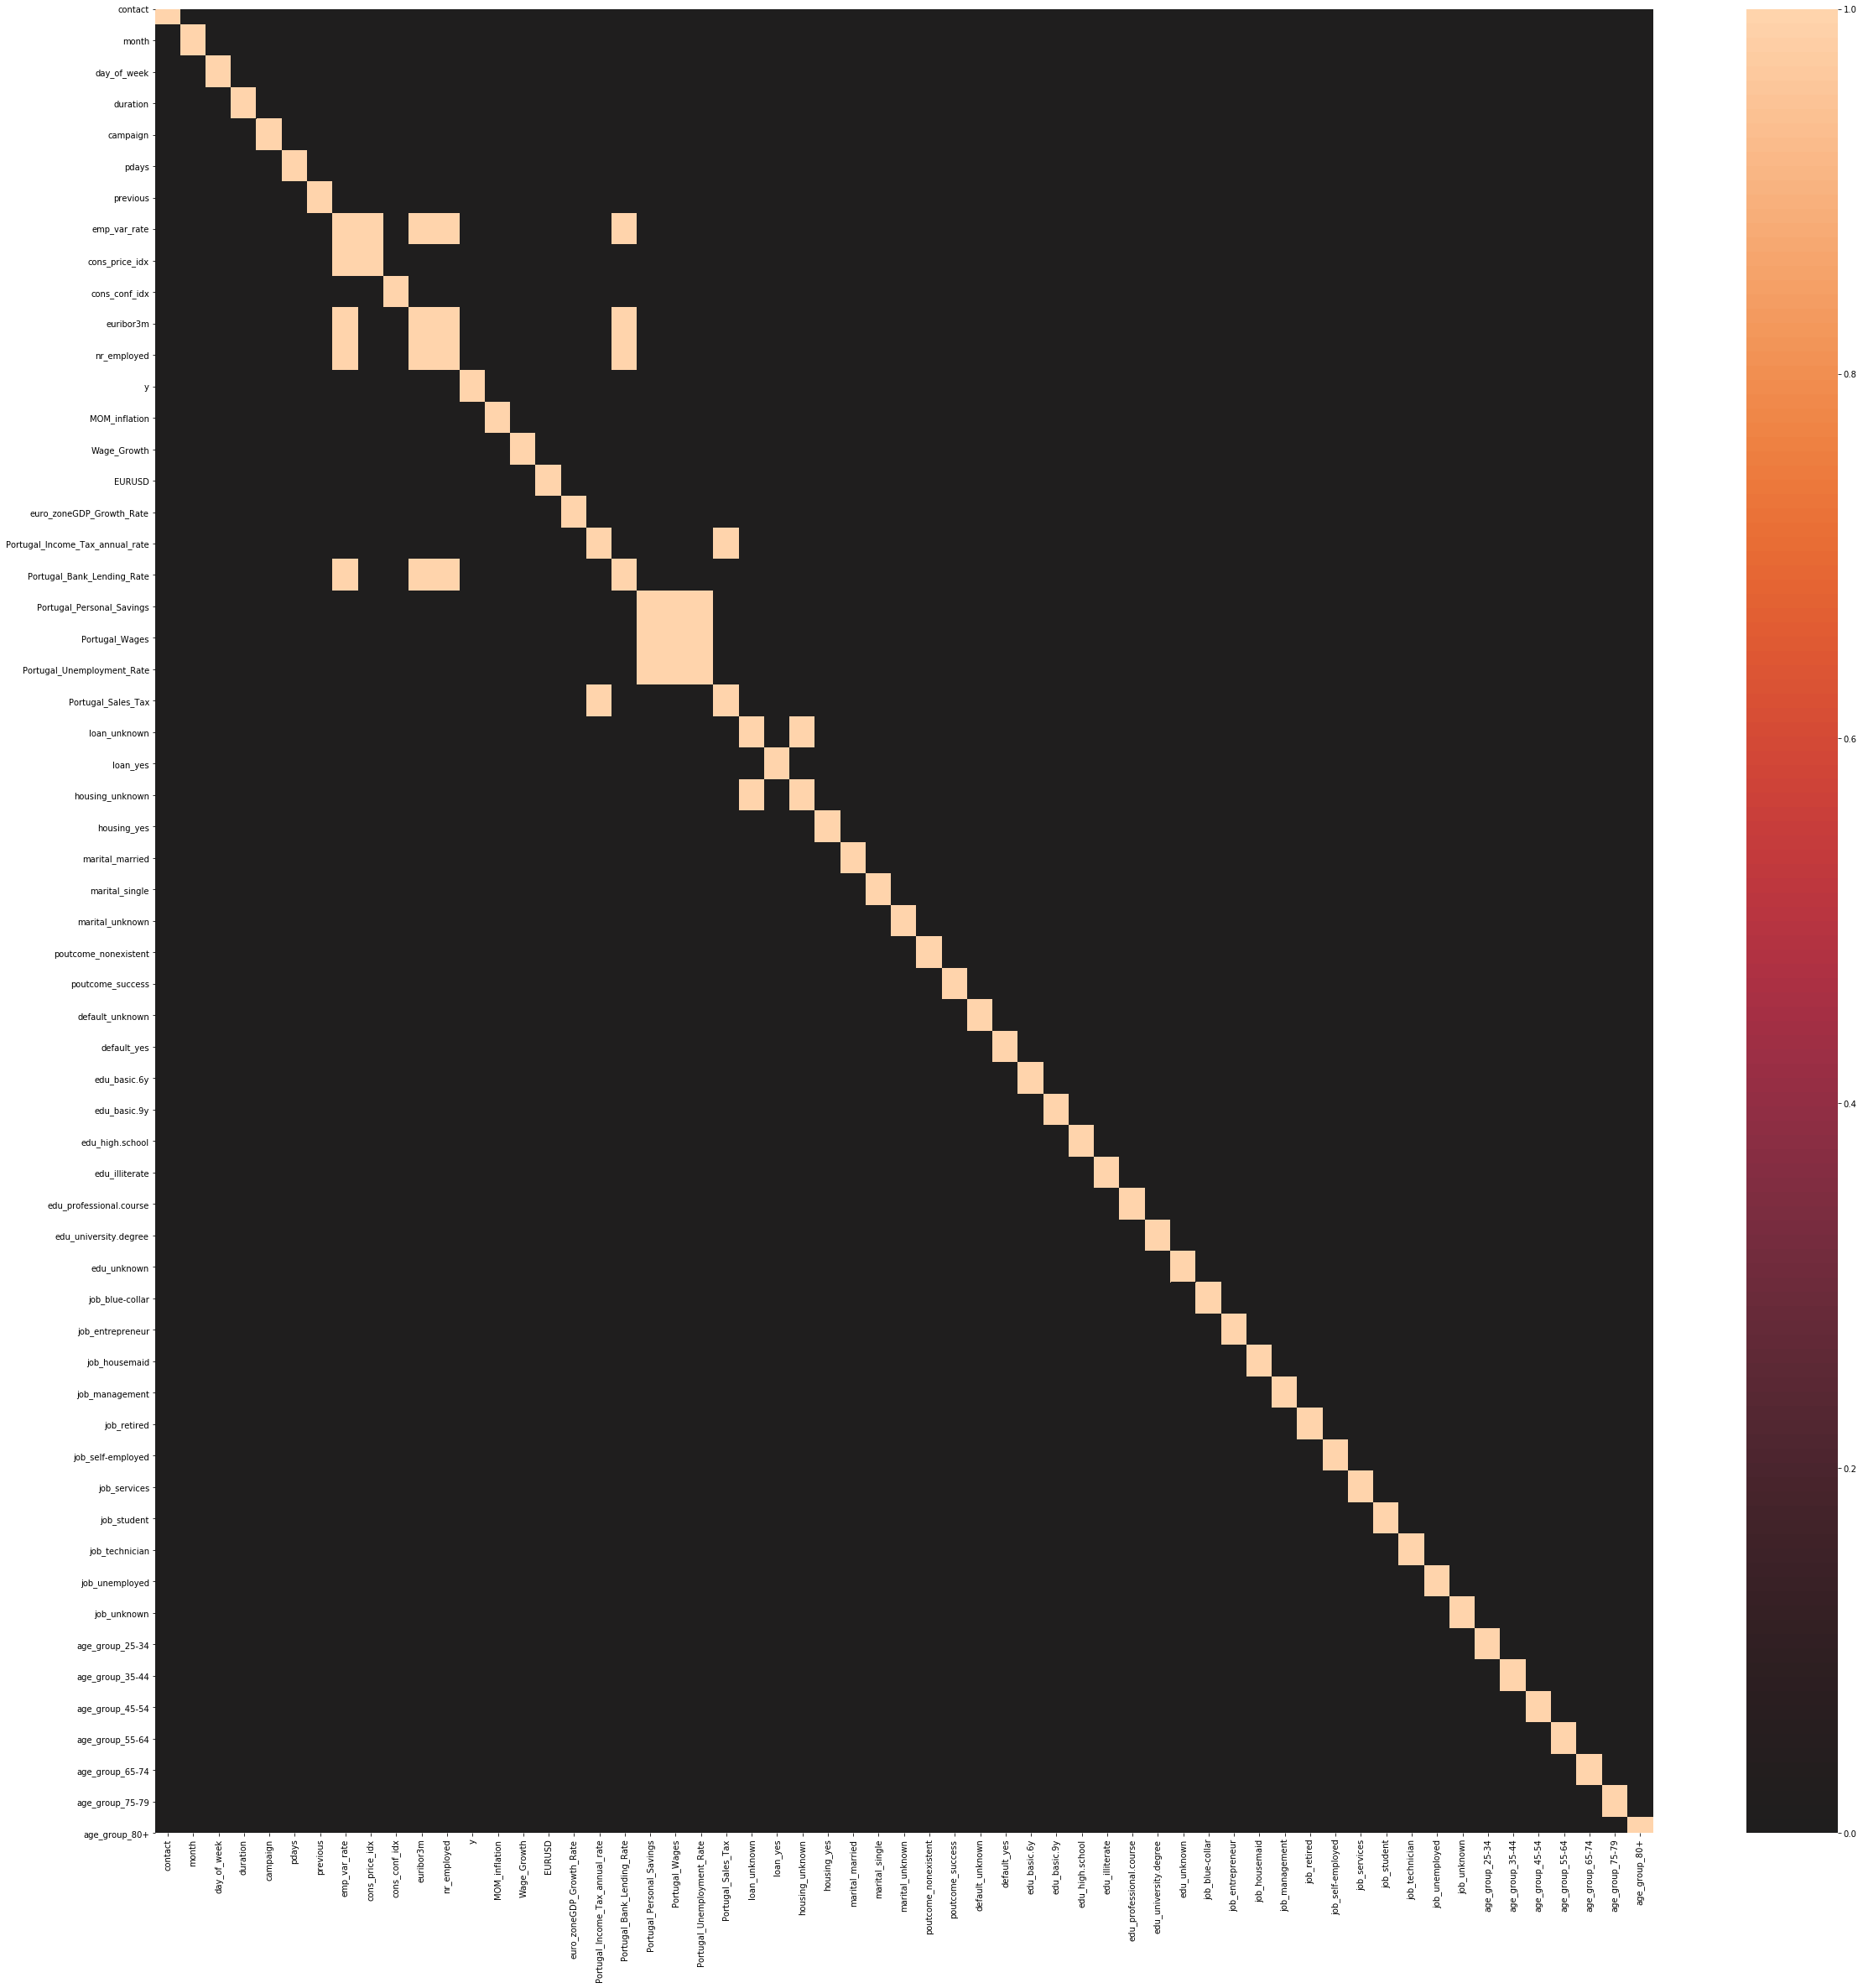

In [175]:
plt.figure(figsize=(40,40))
sns.heatmap(abs(data_cleaned.corr()>0.7), center=0)
plt.show();

In [182]:
X = data_cleaned.drop(columns='y', axis=1)
y = data_cleaned['y']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [184]:
data_final_vars=data_cleaned.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[ True False False False False False  True  True False False False False
  True False False  True False  True False False False  True False False
 False False False False False False  True  True False False  True  True
 False False False False  True False False False  True  True  True  True
 False False False False  True  True False False  True  True]
[ 1 20 12 24  4 33  1  1  2  8 23 21  1 22 30  1 10  1  7 18  9  1 38 31
 37 32 16  5 36 19  1  1 39 17  1  1 35 15 13 29  1 27 28 25  1  1  1  1
 11 26 34  3  1  1 14  6  1  1]


//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [181]:
data_cleaned.columns

Index(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'MOM_inflation', 'Wage_Growth',
       'EURUSD', 'euro_zoneGDP_Growth_Rate', 'Portugal_Income_Tax_annual_rate',
       'Portugal_Bank_Lending_Rate', 'Portugal_Personal_Savings',
       'Portugal_Wages', 'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax',
       'loan_unknown', 'loan_yes', 'housing_unknown', 'housing_yes',
       'marital_married', 'marital_single', 'marital_unknown',
       'poutcome_nonexistent', 'poutcome_success', 'default_unknown',
       'default_yes', 'edu_basic.6y', 'edu_basic.9y', 'edu_high.school',
       'edu_illiterate', 'edu_professional.course', 'edu_university.degree',
       'edu_unknown', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemploy

In [166]:
data_cleaned.to_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/data_feat.csv')